## Data Exploration

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("telco_train.csv", index_col=0)

In [4]:
df.customer_id.nunique() == df.shape[0]

True

Only one observation per customer, so no way to track change in customer attributes over time.

In [5]:
df.describe()

,gender,partner,dependents,phone_service,paperless_billing,multiple_lines,internet_service,online_security,device_protection,tech_support,streaming_tv,streaming_movies,tenure,contract,payment_method,monthly_charges,total_charges,senior_citizen,online_backup,churn
count,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000
mean,0.487575,0.484558,0.298722,0.902023,0.590167,-0.149095,1.440362,-0.428470,-0.314519,-0.421725,-0.225772,-0.220092,32.373092,1.690451,2.320376,64.864253,2287.087948,0.160809,-0.299965,0.265531
std,0.499890,0.499806,0.457738,0.297309,0.491846,0.988911,0.496475,0.903636,0.949335,0.906804,0.974267,0.975566,24.424539,0.830168,1.150392,30.089324,2263.197899,0.367388,0.954035,0.441655
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,1.000000,18.250000,0.000000,0.000000,-1.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,9.000000,1.000000,1.000000,35.750000,406.275000,0.000000,-1.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,29.000000,1.000000,2.000000,70.525000,1405.650000,0.000000,-1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,55.000000,2.000000,3.000000,89.937500,3806.612500,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,3.000000,4.000000,118.600000,8684.800000,1.000000,1.000000,1.000000


In [6]:
df.isnull().sum()

customer_id          0
gender               0
partner              0
dependents           0
phone_service        0
paperless_billing    0
multiple_lines       0
internet_service     0
online_security      0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
tenure               0
contract             0
payment_method       0
monthly_charges      0
total_charges        0
senior_citizen       0
online_backup        0
churn                0
dtype: int64

No missing values in the whole dataset.

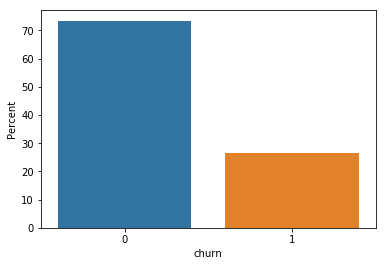

In [7]:
ax = sns.barplot(x="churn", y="churn", data=df, estimator=lambda x: len(x)/len(df) * 100)
ax.set(ylabel="Percent")
plt.show()

The two classes are imbalanced. Need to take this into account when performing feature engineering and method selection.

### Scaling the features

In [9]:
from sklearn.preprocessing import StandardScaler

y = df.churn.values
df_x = df.drop(labels = ["customer_id", "churn"], axis=1)
X = df_x.values

X = StandardScaler().fit_transform(X)

array([ 1.02516569, -0.96957859, -0.65266232,  0.32957344,  0.83332832,
        1.16208349,  1.12732361, -0.63253411, -0.72212816, -0.63776294,
        1.25826019,  1.25076217,  0.88553679,  1.5775905 ,  0.59082825,
        1.07475386,  1.25601669, -0.4377492 ,  1.36271713])

### PCA

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents, 
                          columns = ["PC1", "PC2"])

In [12]:
finalDf = pd.concat([principalDf, df.churn], axis=1)

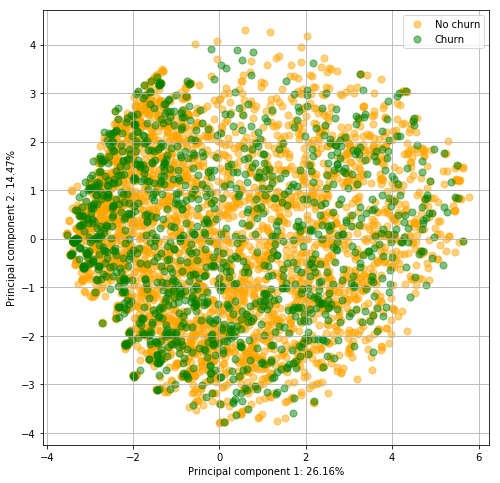

In [36]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

var = pca.explained_variance_ratio_
ax.set_xlabel("Principal component 1: " + (round(var[0]*100,2).astype(str) + "%"))
ax.set_ylabel("Principal component 2: " + (round(var[1]*100,2).astype(str) + "%"))

target = [0, 1]
colors = ('orange', 'green')
for target, color in zip(target, colors):
    indicesToKeep = finalDf.churn == target
    ax.scatter(finalDf.loc[indicesToKeep, "PC1"], 
               finalDf.loc[indicesToKeep, "PC2"], 
               c = color, 
               s = 50,
               alpha = 0.5)

ax.legend(["No churn", "Churn"])
ax.grid()

### Correlation matrix and pair plots

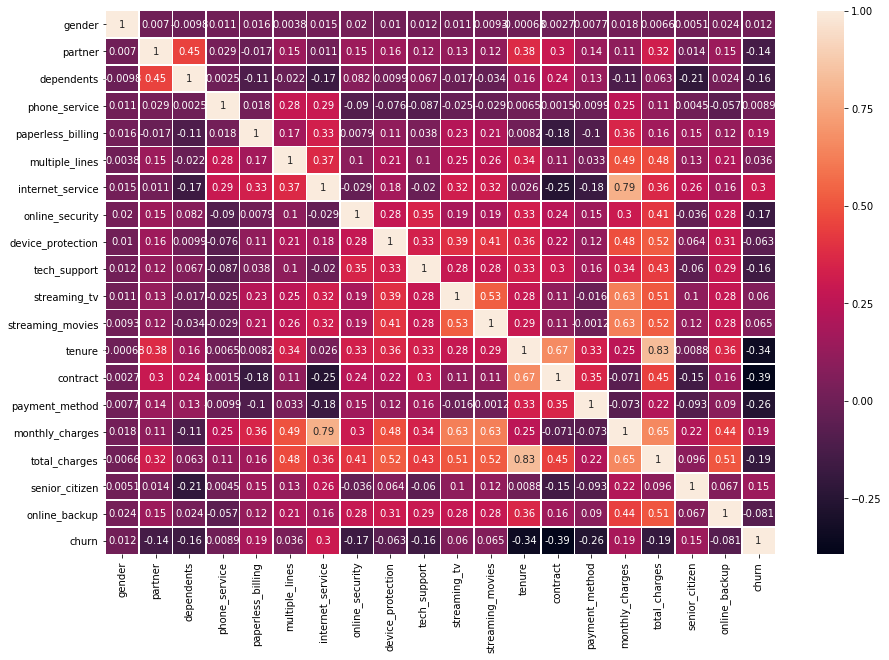

In [37]:
import seaborn as sns

corr = df.drop("customer_id", axis=1).corr()

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)
plt.show()

In [12]:
# pairs = sns.pairplot(df.drop("customer_id", axis=1))
# pairs.savefig("pairs.png")

### Closer look at the quantitative variables in the dataset

In [74]:
quant_vars = df.nunique()[df.nunique() > 5].index.values
quant_vars = np.delete(quant_vars, 0) # removing customer_id
quant_data = df[np.append(quant_vars, "churn")]

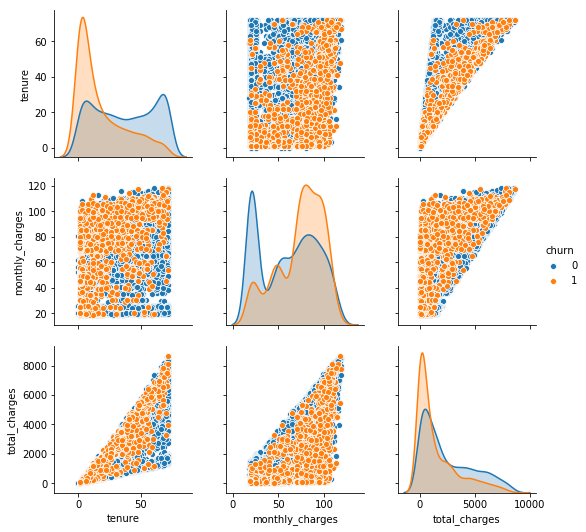

In [76]:
sns.pairplot(data=quant_data, vars=quant_vars, hue="churn")
plt.show()